In [116]:
import import_ipynb
import DecisionTree
import Metrics

In [117]:
import numpy as np
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import time

#Random Forest

**Class RandomForest:**

- **__init__:** This method initializes a RandomForest instance with parameters `n_trees`, `min_samples`, and `max_depth`. It sets up the number of trees in the forest, the minimum number of samples required to split a node, and the maximum depth of each tree.

- **bagging:** This method performs bagging (bootstrap aggregation) on the input data `X` and labels `y`. It randomly selects samples with replacement, returning a new subset of data and labels.

- **fit:** This method fits the RandomForest model to the training data `X` and labels `y`. It iterates through the specified number of trees, performs bagging to create random subsets of data, and fits a DecisionTree to each subset.

- **most_label:** This method calculates the most frequent label in a given set of labels `y`.

- **predict:** This method makes predictions for new data `X` using the trained RandomForest model. It gathers predictions from each DecisionTree in the forest and returns the most frequent prediction for each sample.


In [118]:
class RandomForest:

    def __init__(self, n_trees=3, min_samples=2, max_depth=None, seed = None):

        self.n_trees = n_trees
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.trees = []
        self.seed = seed

    def baaging(self, X, y):

        if self.seed is not None:
            random.seed(self.seed)

        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):

        self.trees = []

        for i in range(self.n_trees):
            tree = DecisionTree.DecisionTree(max_depth=self.max_depth, min_samples=self.min_samples)
            X_sample, y_sample = self.baaging(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def most_label(self, y):

        y = list(y)
        ml = max(y, key=y.count)
        return ml

    def predict(self, X):

        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self.most_label(pred) for pred in tree_preds])
        return predictions

In [119]:
def tree_plot_forest(trees):
    plt.figure(figsize=(15, 5))

    for i, tree in enumerate(trees):
        plt.subplot(1, len(trees), i+1)
        plt.title(f"Tree {i+1}")
        plt.axis('off')
        DecisionTree.tree_plot(tree.root)

    plt.tight_layout()
    plt.show()

#Synthetic Single-Mode Dataset:

In [120]:
X, y = make_classification(n_samples=2568, n_features=2, n_informative=2, n_redundant=0,
                            n_clusters_per_class=1, random_state=254468)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=254468)

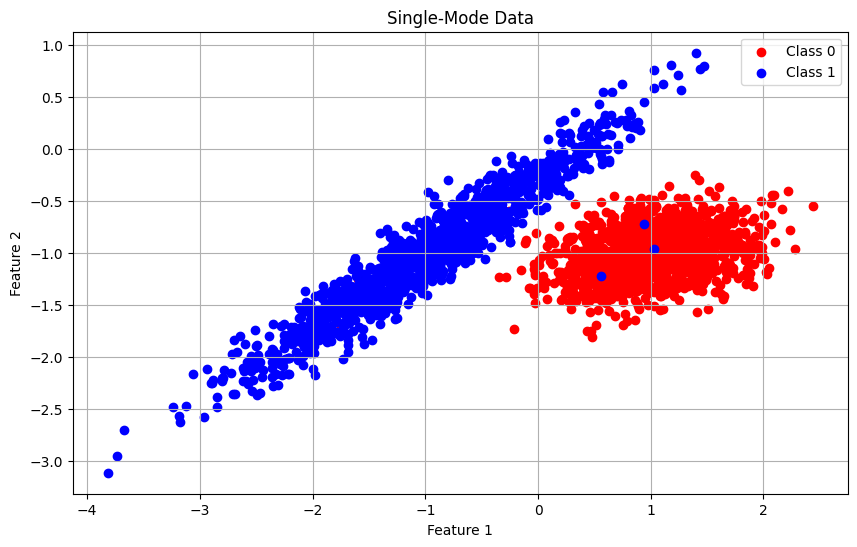

In [121]:
plt.figure(figsize=(10, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')

plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

plt.title('Single-Mode Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
model = RandomForest(n_trees=5, min_samples=2, max_depth=2, seed=254468)
model.fit(X_train, y_train)
y_pred_anl = model.predict(X_test)

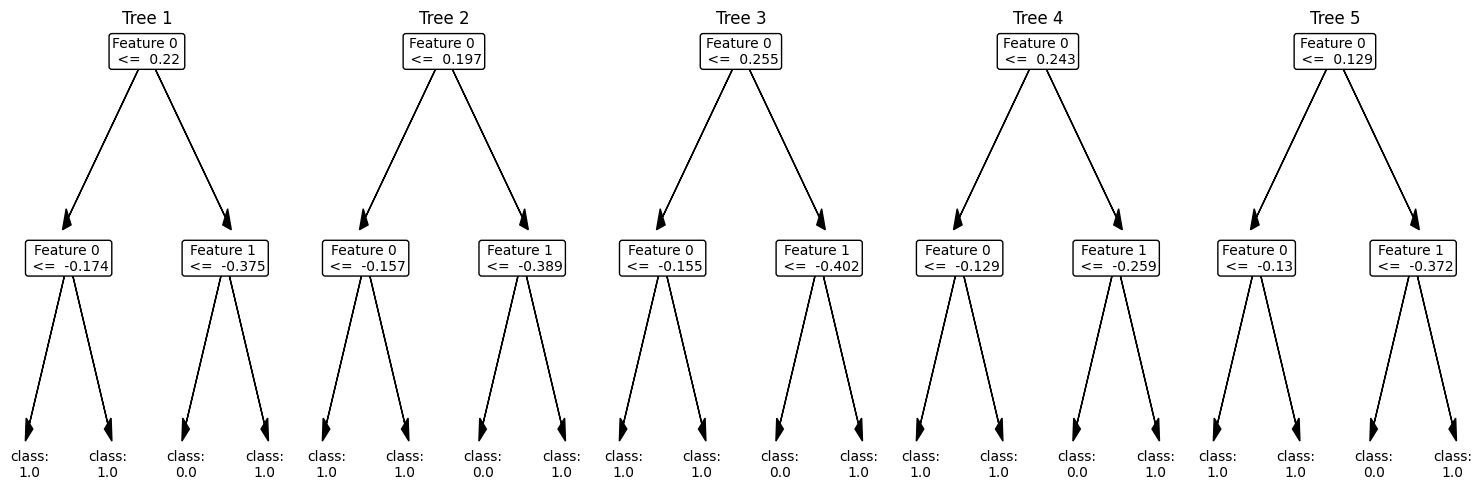

In [123]:
tree_plot_forest(model.trees)

In [124]:
RF = RandomForestClassifier(n_estimators=5, max_depth=2, min_samples_split=2, criterion='gini', random_state=254468)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

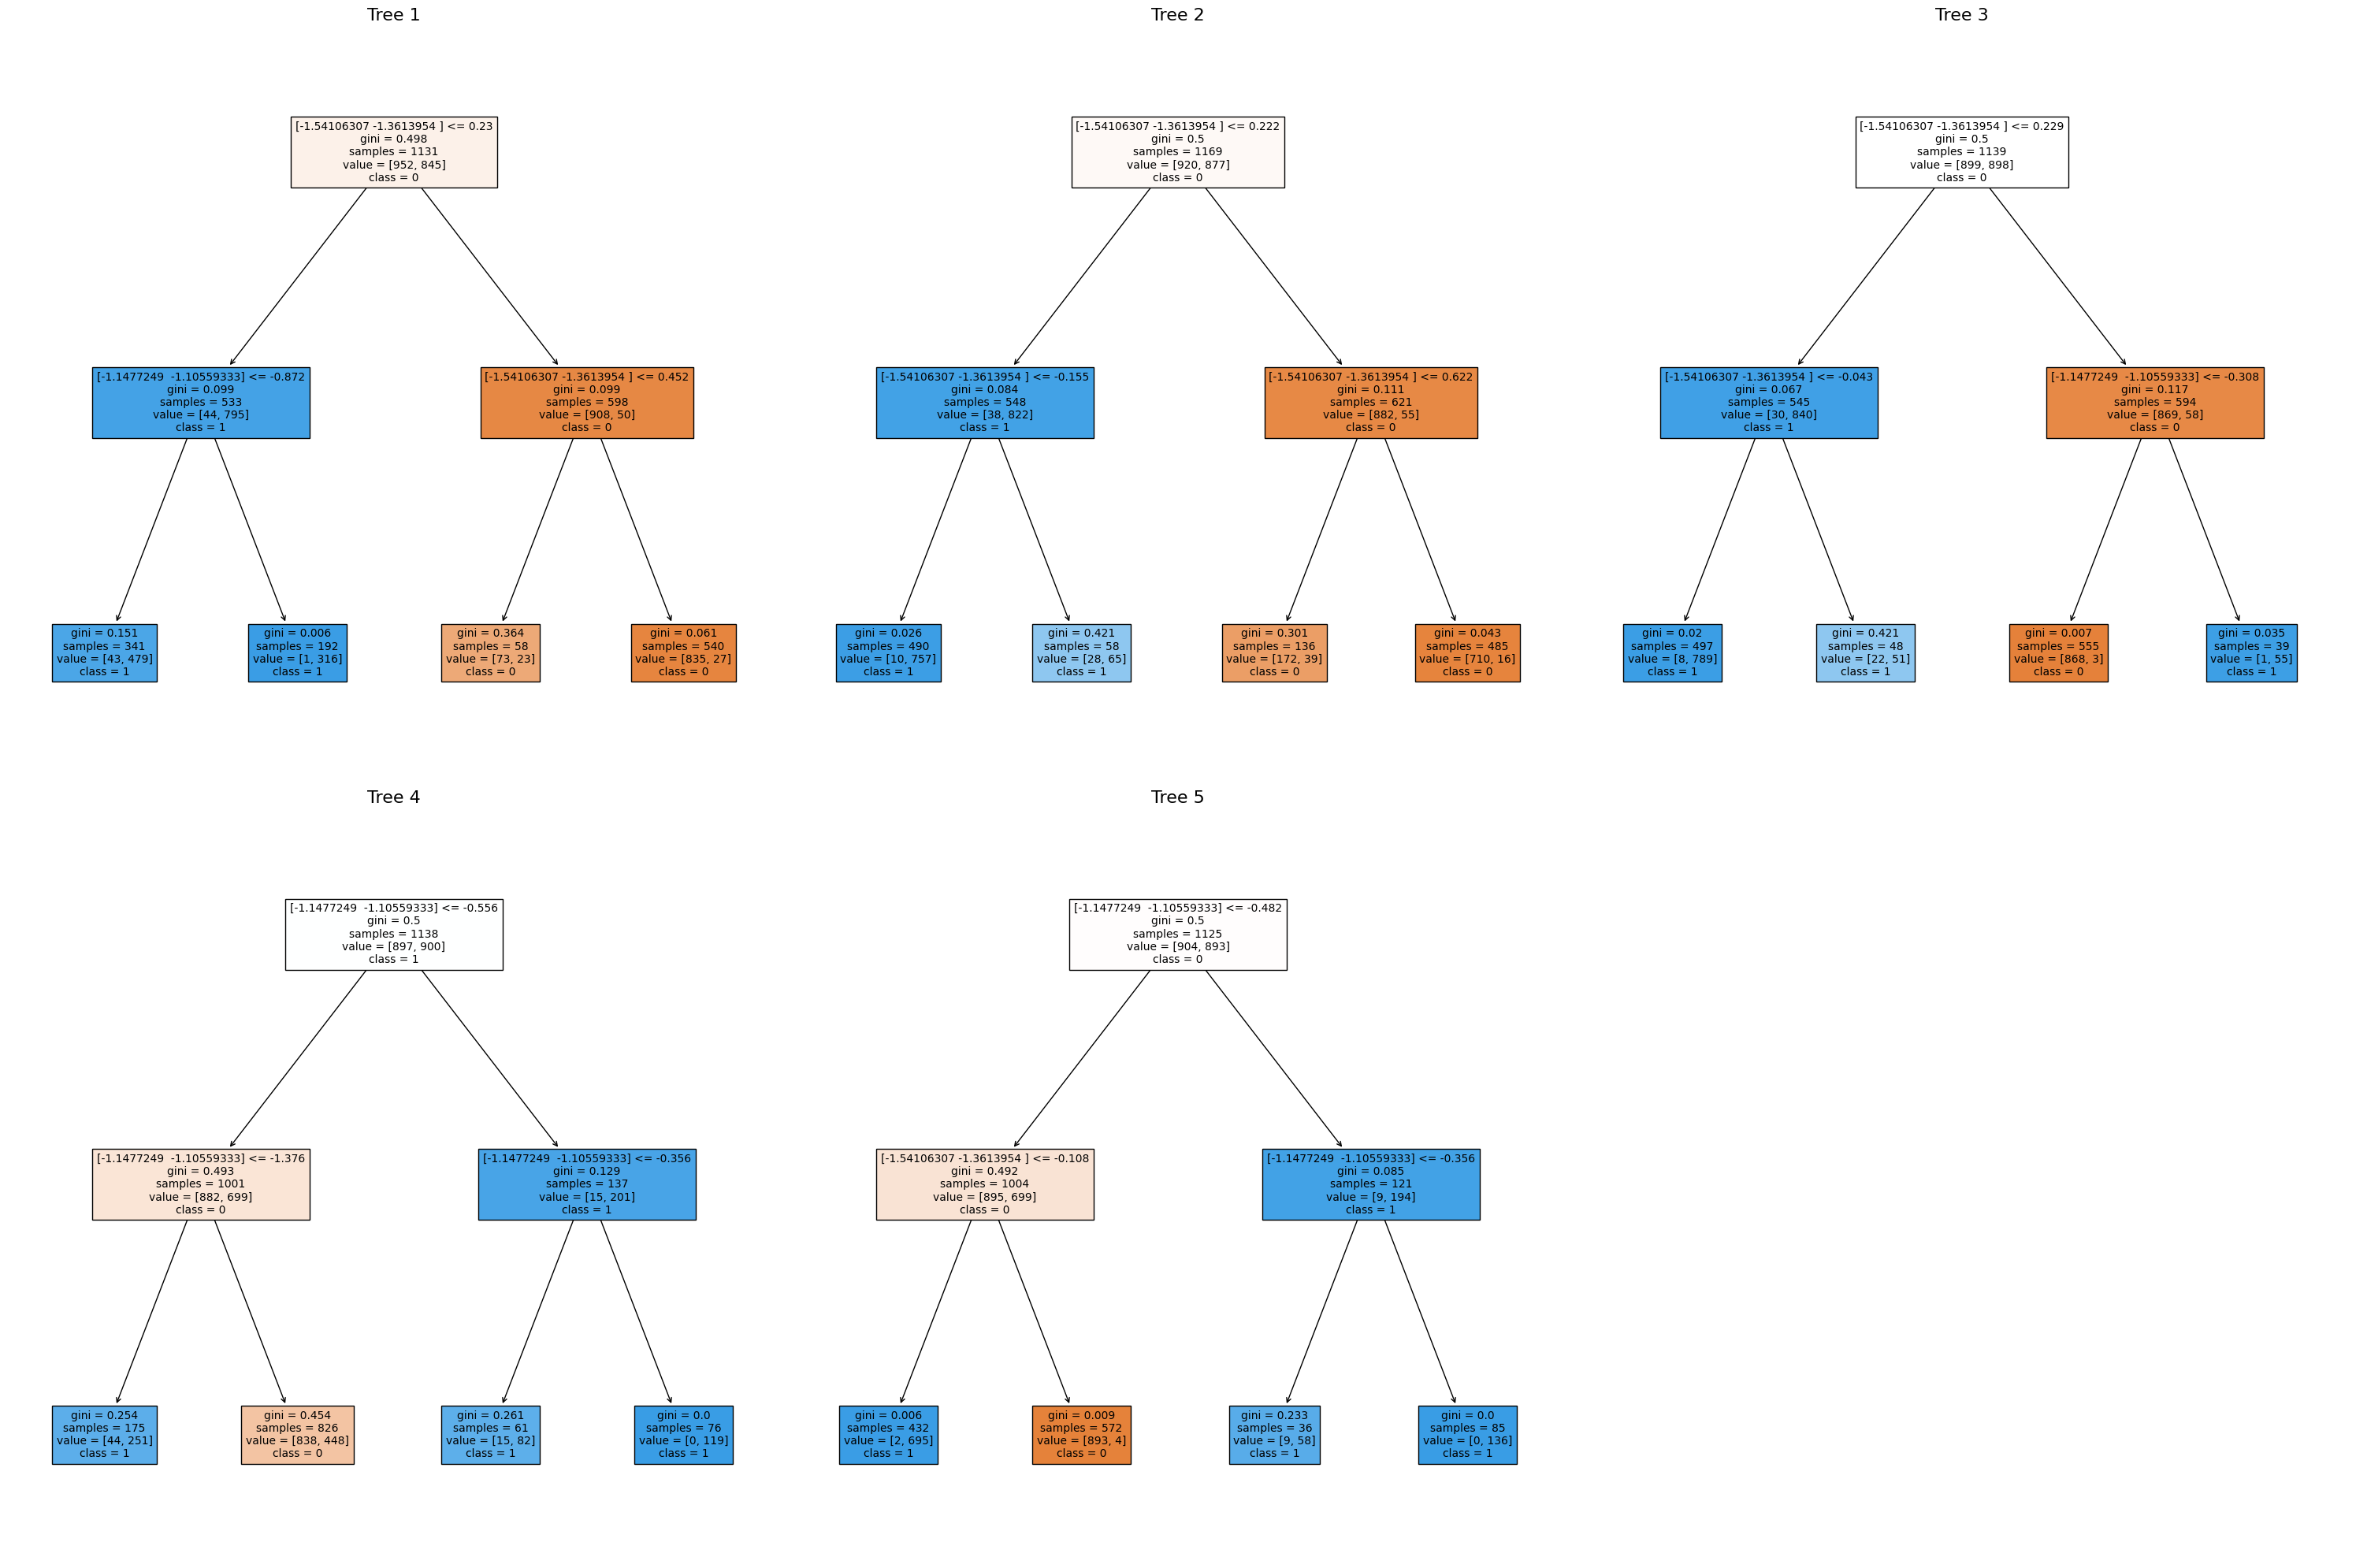

In [125]:
n_estimators = len(RF.estimators_)

plt.figure(figsize=(30, 20))

for i in range(n_estimators):
    plt.subplot(2, 3, i + 1)
    tree.plot_tree(RF.estimators_[i], filled=True, feature_names=X_train, class_names=['0', '1'], fontsize=10)
    plt.title(f"Tree {i + 1}", fontsize=16)
plt.tight_layout()
plt.show()

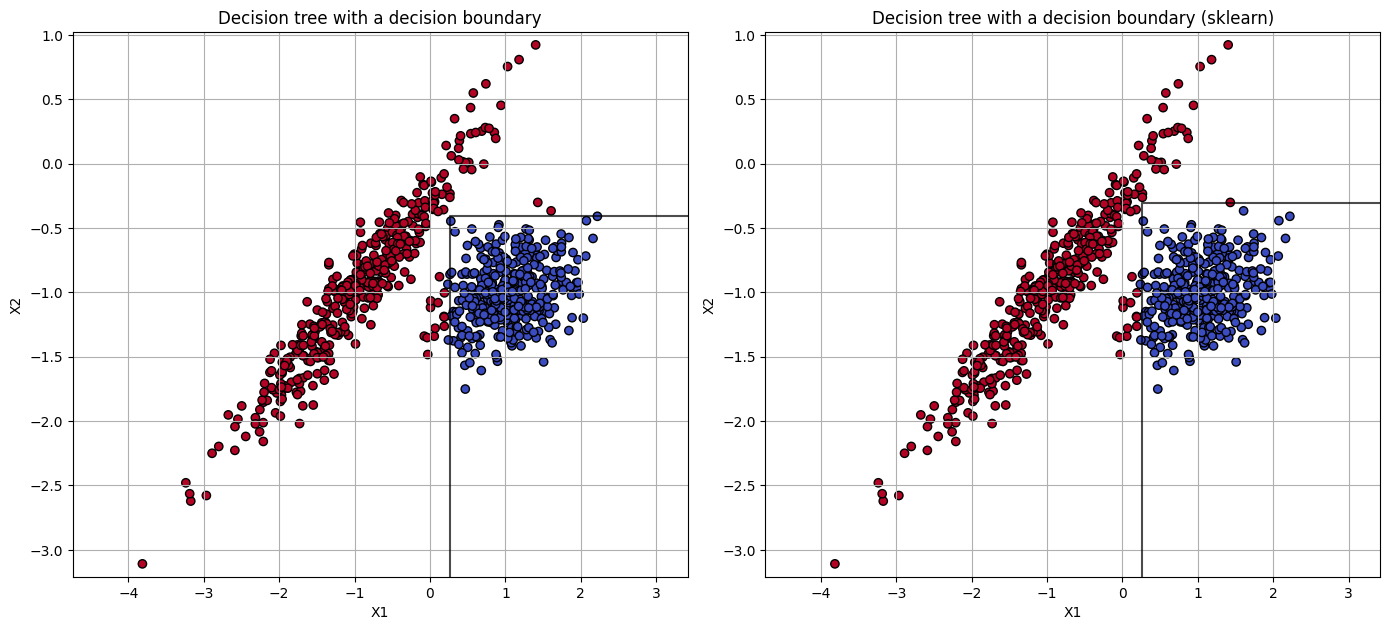

In [126]:
h = 0.05
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = np.min(X[:, 1])-0.1, np.max(X[:, 1])+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z1 = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
Z1 = Z1.reshape(xx.shape)

Z2 = RF.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.contour(xx, yy, Z1, colors='k', levels=[0], alpha=0.7, linestyles='-', extend='both')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_anl, edgecolors='k', cmap='coolwarm')
plt.title('Random Forest with a decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(y_min, y_max)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.contour(xx, yy, Z2, colors='k', levels=[0], alpha=0.7, linestyles='-', extend='both')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolors='k', cmap='coolwarm')
plt.title('Random Forest with a decision boundary (sklearn)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(y_min, y_max)
plt.grid(True)

plt.tight_layout()
plt.show()

In [127]:
conf_matrix_anl, sensitivity_anl, specificity_anl = Metrics.metrics(y_test, y_pred_anl)

print("Confusion Matrix (Custom Implementation):")
print(conf_matrix_anl)
print("Sensitivity:", sensitivity_anl)
print("Specificity:", specificity_anl)

Confusion Matrix (Custom Implementation):
[[365  20]
 [  2 384]]
Sensitivity: 0.9948186528497409
Specificity: 0.948051948051948


In [128]:
conf_matrix, sensitivity, specificity = Metrics.metrics(y_test, y_pred)

print("Confusion Matrix (sklearn):")
print(conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Confusion Matrix (sklearn):
[[366  19]
 [  2 384]]
Sensitivity: 0.9948186528497409
Specificity: 0.9506493506493506


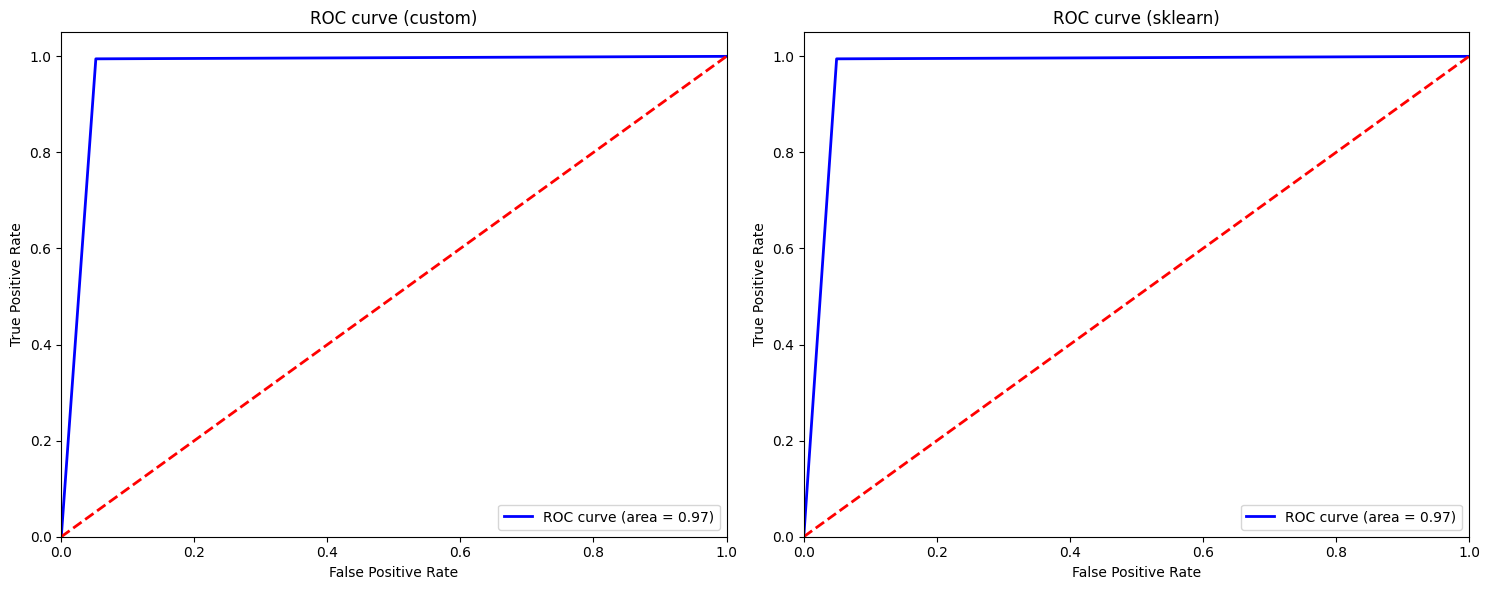

In [129]:
Metrics.plot_ROC(X_test, y_test, model, RF)

As we can see, both models work identically! Let's choose a more difficult data set and see if our own implementation can handle it as well. Additionally, we will set the parameter max_depth = `None` so that the models can see how the decision boundary will behave in such a case.

#Multi-Mode Dataset

In [130]:
X_multi, y_multi = make_classification(n_samples=2568, n_features=2, n_informative=2, n_redundant=0,
                                        n_clusters_per_class=2, random_state=254468)

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=254468)

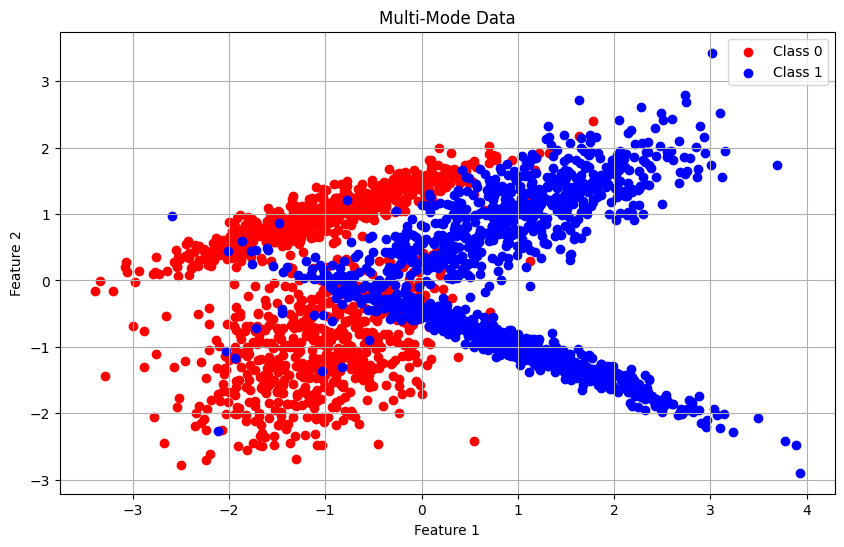

In [131]:
plt.figure(figsize=(10, 6))

plt.scatter(X_multi[y_multi == 0, 0], X_multi[y_multi == 0, 1], color='red', label='Class 0')

plt.scatter(X_multi[y_multi == 1, 0], X_multi[y_multi == 1, 1], color='blue', label='Class 1')

plt.title('Multi-Mode Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
start = time.time()
model = RandomForest(n_trees=5, min_samples=2, max_depth=None, seed=254468)
model.fit(X_train, y_train)
end = time.time()
print(f'The algorithm took {end-start} seconds to execute')

y_pred_anl = model.predict(X_test)

The algorithm took 13.6234712600708 seconds to execute


In [133]:
start = time.time()
RF = RandomForestClassifier(n_estimators=5, max_depth=None, min_samples_split=2, criterion='gini', random_state=254468)
RF.fit(X_train, y_train)
end = time.time()
print(f'The algorithm from sklearn took {end-start} seconds to execute')

y_pred = RF.predict(X_test)

The algorithm from sklearn took 0.013839006423950195 seconds to execute


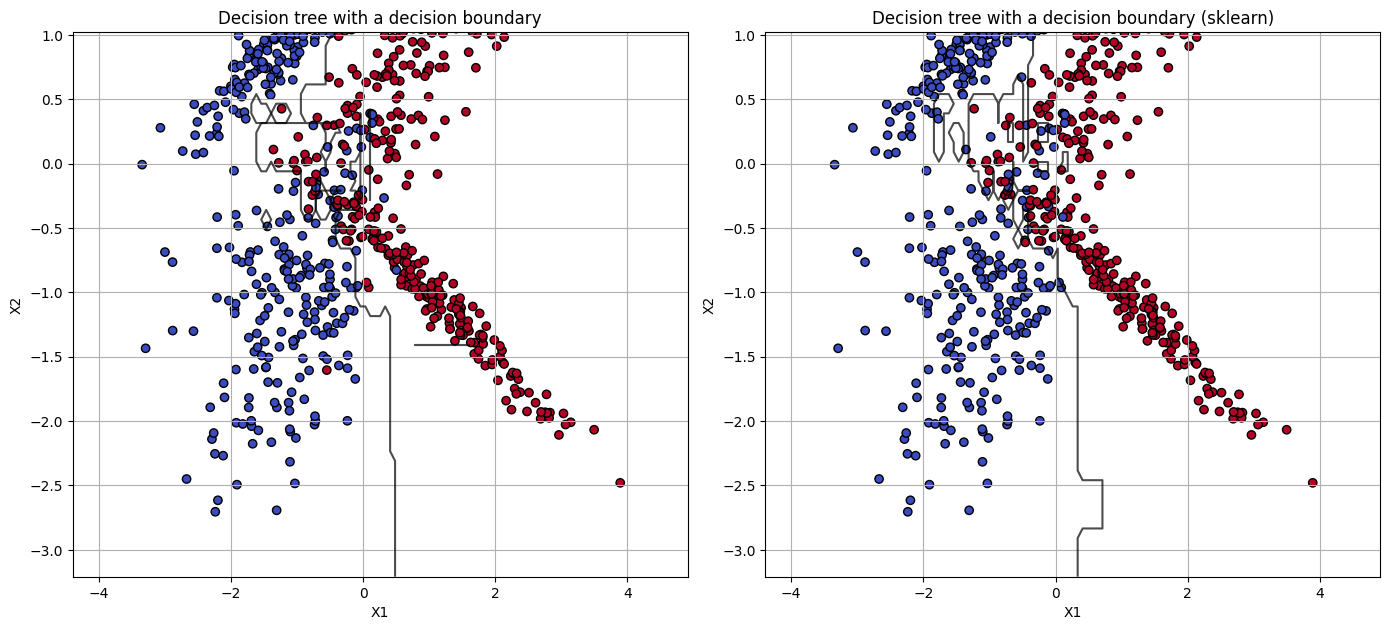

In [134]:
h = 0.075
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = np.min(X[:, 1])-0.1, np.max(X[:, 1])+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z1 = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
Z1 = Z1.reshape(xx.shape)

Z2 = RF.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.contour(xx, yy, Z1, colors='k', levels=[0], alpha=0.7, linestyles='-', extend='both')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_anl, edgecolors='k', cmap='coolwarm')
plt.title('Random Forest with a decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(y_min, y_max)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.contour(xx, yy, Z2, colors='k', levels=[0], alpha=0.7, linestyles='-', extend='both')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolors='k', cmap='coolwarm')
plt.title('Random Forest with a decision boundary (sklearn)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(y_min, y_max)
plt.grid(True)

plt.tight_layout()
plt.show()

In [135]:
conf_matrix_anl, sensitivity_anl, specificity_anl = Metrics.metrics(y_test, y_pred_anl)

print("Confusion Matrix (Custom Implementation):")
print(conf_matrix_anl)
print("Sensitivity:", sensitivity_anl)
print("Specificity:", specificity_anl)

Confusion Matrix (Custom Implementation):
[[352  38]
 [ 31 350]]
Sensitivity: 0.9186351706036745
Specificity: 0.9025641025641026


In [136]:
conf_matrix, sensitivity, specificity = Metrics.metrics(y_test, y_pred)

print("Confusion Matrix (sklearn):")
print(conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Confusion Matrix (sklearn):
[[351  39]
 [ 26 355]]
Sensitivity: 0.931758530183727
Specificity: 0.9


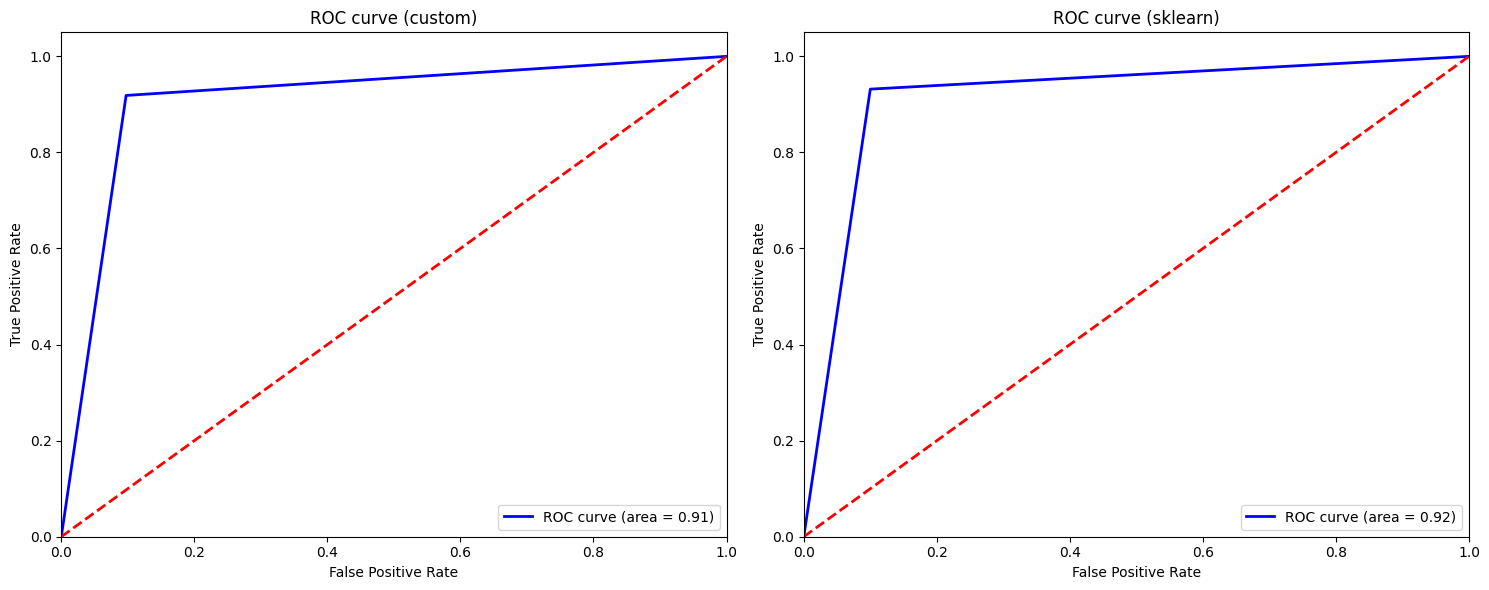

In [137]:
Metrics.plot_ROC(X_test, y_test, model, RF)

Both models work great! We can claim that our implementation works as well as the one from sklearn (but much longer).